In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from joblib import load
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns

In [2]:
X_train, X_test, y_train, y_test = load('../../preprocessing/classification_data.joblib')

In [3]:
def build_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print('Train data:')
    model_info(y_train, y_train_pred)
    print('-----------------------------------------------')
    print('Test data:')
    model_info(y_test, y_test_pred)
    
    return model, y_train_pred, y_test_pred

In [4]:
def model_info(y_real, y_pred):
    cm = confusion_matrix(y_real, y_pred)

    plt.figure(figsize=(4, 3))
    sns.set(font_scale=1)

    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Reds',
        linewidths=0.5,
        cbar=False,
        square=True,
        xticklabels=['Bronze', 'Gold', 'No Medal', 'Silver'],
        yticklabels=['Bronze', 'Gold', 'No Medal', 'Silver'],
    )

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    print('Accuracy score:  ', accuracy_score(y_real, y_pred))
    print('Precision score: ', precision_score(y_real, y_pred, average='macro'))
    print('Recall score:    ', recall_score(y_real, y_pred, average='macro'))
    print('F1 score:        ', f1_score(y_real, y_pred, average='macro'))
    

In [5]:
from sklearn.neighbors import KNeighborsClassifier

In [6]:
knn = KNeighborsClassifier()

Train data:


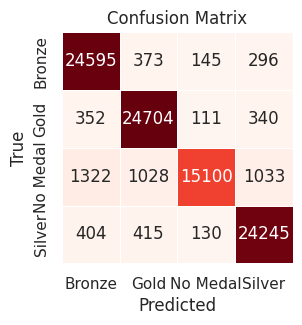

Accuracy score:   0.9371095112746186
Precision score:  0.9410714503138327
Recall score:     0.9289454492651009
F1 score:         0.9329884922948736
-----------------------------------------------
Test data:


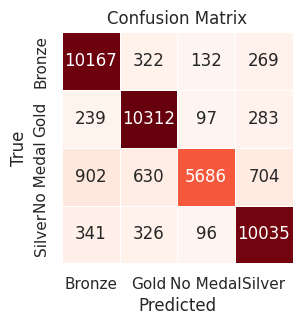

Accuracy score:   0.8929232135369133
Precision score:  0.8993011811385817
Recall score:     0.8810169215998018
F1 score:         0.8856814731992828


In [7]:
knn_model, y_train_pred_knn, y_test_pred_knn = build_model(knn, X_train, X_test, y_train, y_test)

## Optimizacija KNN modela

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
params = {
    'n_neighbors': [1, 5, 10, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [10]:
estimator_knn = GridSearchCV(KNeighborsClassifier(), param_grid=params)

In [11]:
estimator_knn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 5, 10, 20], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [ ]:
print('Najbolji parametri: ')
estimator_knn.best_params_

In [ ]:
print('Najbolji rezultat: ')
estimator_knn.best_score_

Train data:


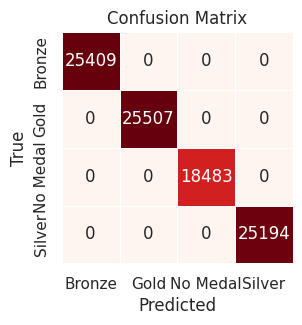

Accuracy score:   1.0
Precision score:  1.0
Recall score:     1.0
F1 score:         1.0
-----------------------------------------------
Test data:


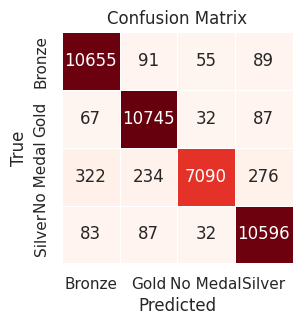

Accuracy score:   0.9641104067487235
Precision score:  0.965808411002146
Recall score:     0.9594183977361936
F1 score:         0.9620067487044386


In [12]:
best_knn_model, y_train_pred, y_test_pred = build_model(estimator_knn.best_estimator_, X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

class_names = ['Bronze', 'Gold', 'No Medal', 'Silver']

y_train_bin = label_binarize(y_train, classes = ['Bronze', 'Gold', 'No_Medal', 'Silver'])
y_test_bin = label_binarize(y_test, classes = ['Bronze', 'Gold', 'No_Medal', 'Silver'])

models = [knn_model, best_knn_model]
model_names = ['KNeighbors', 'KNeighbors CV']

plt.figure(figsize = (15, 5))

for class_index in range(y_train_bin.shape[1]):
    plt.subplot(1, y_train_bin.shape[1], class_index + 1)  
    plt.title(class_names[class_index])
    
    for model, model_name in zip(models, model_names):
        y_pred = model.predict_proba(X_test)
   
        fpr, tpr, _ = roc_curve(y_test_bin[:, class_index],  y_pred[:, class_index])
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label = f'{model_name} (AUC = {roc_auc:.3f})')
        
    plt.plot([0, 1], [0, 1], label = 'Random (auc: 0.5)', color = 'grey', linestyle='--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.legend()

plt.suptitle('ROC Curves for Multiclass Classification')
plt.tight_layout()
plt.show()

## Eksportovanje modela

In [16]:
from joblib import dump

In [17]:
models = [knn_model, best_knn_model]

In [19]:
dump(models, 'knn.joblib')

['knn.joblib']

In [ ]:
pritn('Hello')